# Project 3 - Artificial Neural Networks

This is an **individual assignment**. 

In this project, you will work with a Lung X-Ray dataset and a Retina dataset. You will implement convolutional neural networks for classification tasks with ```TensorFlow```.

The goal of this assignment include:
1. Set up datasets in format needed to run ```TensorFlow``` objects.
2. Implement artificial neural networks with ```TensorFlow```.
3. Carry out experiments to select best ANN hyperparameters.
4. Implement best training practices with ```TensorFlow```, including checkpoints, early stopping, adaptive learning rate.
5. Implement qualitative and quantitative performance measures.
6. Report observations, propose business-centric solutions and propose mitigating strategies.

## Deliverables

As part of this project, you should deliver the following materials:

1. [**4-page IEEE-format paper**](https://www.ieee.org/conferences/publishing/templates.html). Write a paper with no more than 4 pages addressing the questions posed below. When writing this report, consider a business-oriented person as your reader (e.g. your PhD advisor, your internship manager, etc.). Tell *the story* for each datasets' goal and propose solutions by addressing (at least) the questions posed below.

2. **Python Code**. Create two separate Notebooks: (1) "training.ipynb" used for training and hyperparameter tuning, (2) "test.ipynb" for evaluating the final trained model in the test set. The "test.ipynb" should load all trained objects and simply evaluate the performance. So don't forget to **push the trained models** to your repository to allow us to run it.

All of your code should run without any errors and be well-documented. 

3. **README.md file**. Edit the readme.md file in your repository and how to use your code. If there are user-defined parameters, your readme.md file must clearly indicate so and demonstrate how to use your code. **Consider the case where the user wants to utilize your code to run on a different test set. Indicate in your readme.md file how this can be achieved.**

---

# Dataset 1: Lung X-Ray Dataset

The ChestMNIST is based on the [NIH-ChestXray14 dataset](https://ieeexplore.ieee.org/document/8099852), a dataset comprising 112,120 frontal-view X-Ray images of 30,805 unique patients with the text-mined 14 disease labels, which could be formulized as a multi-label binary-class classification task. The dataset as loaded below, uses the official data split, and resize the source images of $1 \times 1,024 \times 1,024$ into $1 \times 28 \times 28$.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [9]:
chestdata = np.load('chestmnist.npz')

X_train=chestdata['train_images']
t_train=chestdata['train_labels']

X_valid=chestdata['val_images']
t_valid=chestdata['val_labels']

X_test=chestdata['test_images']
t_test=chestdata['test_labels']

X_train.shape, t_train.shape, X_valid.shape, t_valid.shape, X_test.shape, t_test.shape

((78468, 28, 28),
 (78468, 14),
 (11219, 28, 28),
 (11219, 14),
 (22433, 28, 28),
 (22433, 14))

In [10]:
class_names = np.array(['Atelectasis','Cardiomegaly','Effusion','Infiltration',
                        'Mass','Nodule','Pneumonia','Pneumothorax','Consolidation',
                        'Edema (Oedema)','Emphysema','Fibrosis','Pleural Thickening',
                        'Hernia'])

In [13]:
t_train.shape

(78468, 14)

The labels for training/validation/test sets are a 14-dimensional vector for its respective x-ray image, where each column corresponds to a possible disease (total of 14). The disease names per column are: (1) Atelectasis, (2) Cardiomegaly, (3) Effusion, (4) Infiltration, (5) Mass, (6) Nodule, (7) Pneumonia, (8) Pneumothorax , (9) Consolidation, (10) Edema (Oedema), (11) Emphysema, (12) Fibrosis, (13) Pleural Thickening, and (14) Hernia.

In [15]:
t_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [25]:
t_train[78]

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

For example:
* If the label is ````[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]````, then the x-ray is labeled as not having a diseasse. 
* If the label is ````[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]````, then the x-ray is labeled as having (1) Atelectasis, (3) Effusion, (4) Infiltration, and (5) Mass.

Thus, the goal is to predict if any one of these diaseases is present in each x-ray image.

Moreover, the labels are **not** a one-hot vector, and each entry in the label array must be considered a binary assignment. So, for each entry in the label vector, we may want to predict a probability ([0,1]) on whether the diasese is present in the x-ray image.

Atelectasis


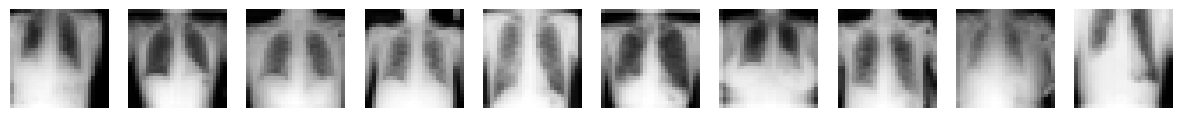

Cardiomegaly


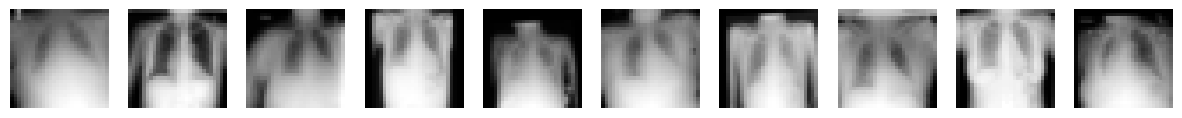

Effusion


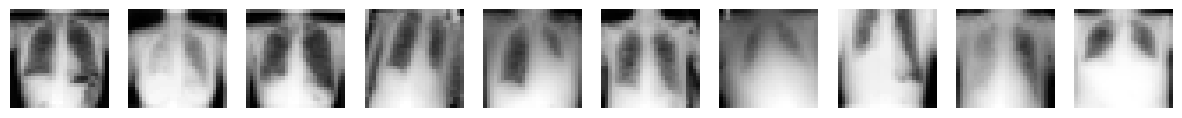

Infiltration


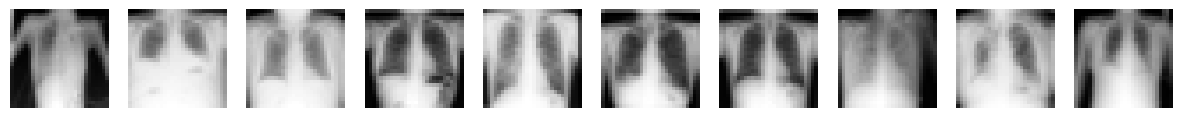

Mass


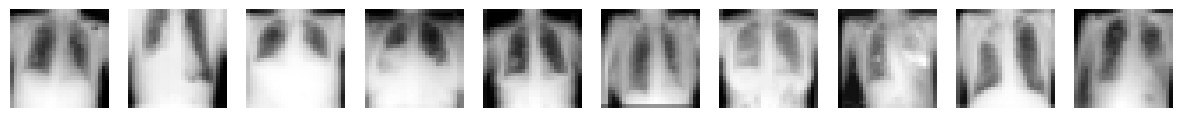

Nodule


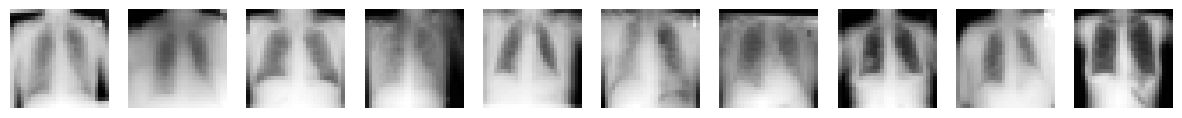

Pneumonia


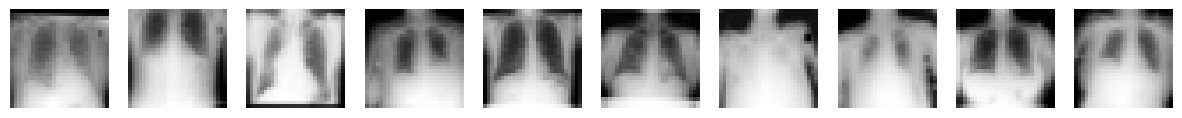

Pneumothorax


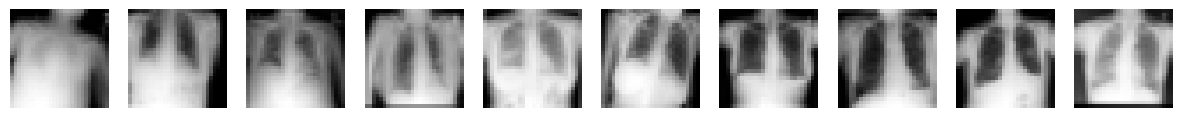

Consolidation


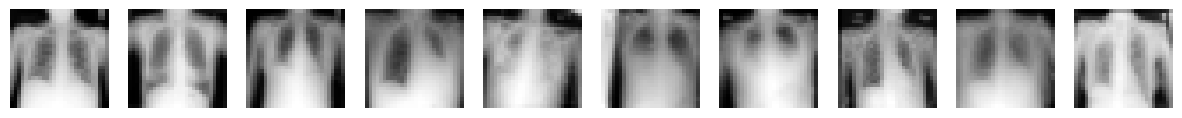

Edema (Oedema)


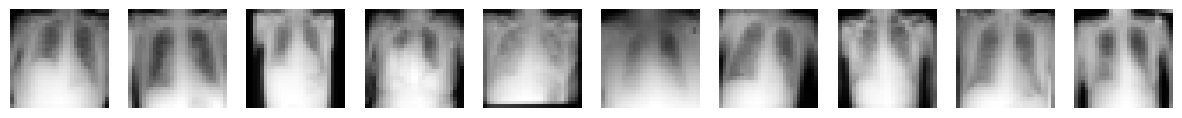

Emphysema


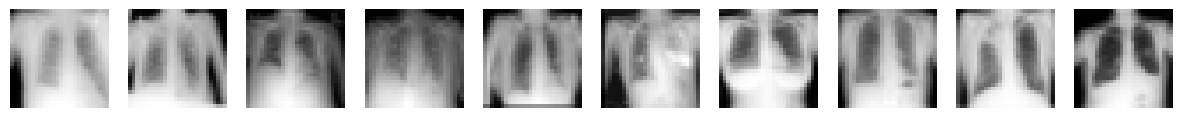

Fibrosis


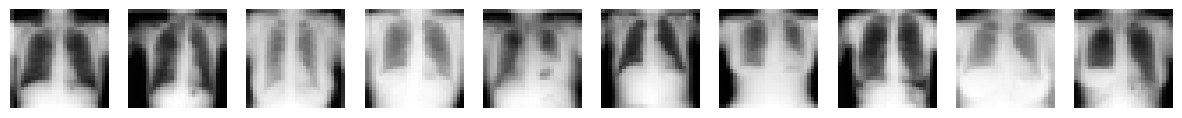

Pleural Thickening


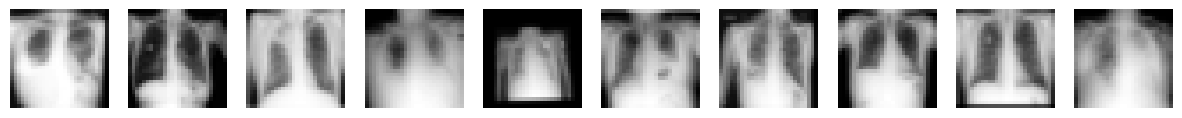

Hernia


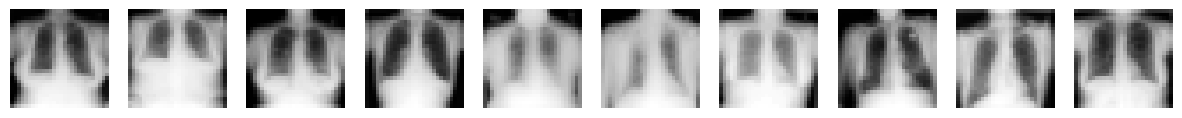

In [4]:
for i in range(14):
    labels = np.where(t_train[:,i]==1)[0]
    idx = np.random.permutation(range(len(labels)))
    print(class_names[i])
    plt.figure(figsize=(15,3))
    for j in range(1,11):
        plt.subplot(1,10,j)
        plt.imshow(X_train[labels[j],:,:], cmap='gray')
        plt.axis('off')
    plt.pause(0.01);

---

# Dataset 2: Retina Dataset

The RetinaMNIST is based on the [DeepDRiD24 challenge](https://pubmed.ncbi.nlm.nih.gov/35755875/), which provides a dataset of 1,600 retina fundus images. The task is ordinal regression for 5-level grading of diabetic retinopathy severity. We split the source training set with a ratio of 9:1 into training and validation set, and use the source validation set as the test set. The source images of $3 \times 1,736 \times 1,824$ are center-cropped with a window size of length of the short edge and resized into $3 \times 28 \times 28$.

In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [28]:
retinadata = np.load('retinamnist_128.npz')

X_train=retinadata['train_images']
t_train=retinadata['train_labels']

X_valid=retinadata['val_images']
t_valid=retinadata['val_labels']

X_test=retinadata['test_images']
t_test=retinadata['test_labels']

X_train.shape, t_train.shape, X_valid.shape, t_valid.shape, X_test.shape, t_test.shape

((1080, 128, 128, 3),
 (1080, 1),
 (120, 128, 128, 3),
 (120, 1),
 (400, 128, 128, 3),
 (400, 1))

In [29]:
class_names = np.array(['Diabetic Retinopathy Level 0', 'Diabetic Retinopathy Level 1', 
                        'Diabetic Retinopathy Level 2', 'Diabetic Retinopathy Level 3', 
                        'Diabetic Retinopathy Level 4'])

In [31]:
t_train.shape

(1080, 1)

In [32]:
np.unique(t_train)

array([0, 1, 2, 3, 4], dtype=uint8)

In this dataset, the targe labels are categories corresponding to one of 5 levels grading of diabetic retinopathy severity. 

The overall goal is to predict the grading level severity (0,1,2,3,4) for each image.

Diabetic Retinopathy Level 0


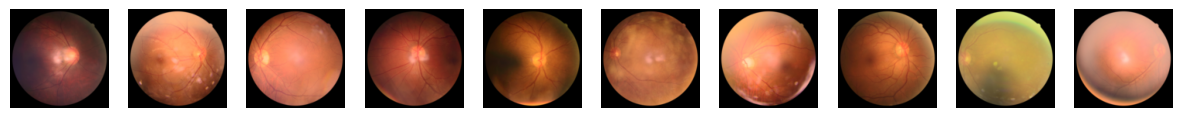

Diabetic Retinopathy Level 1


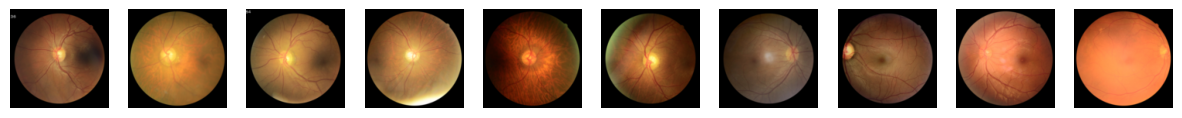

Diabetic Retinopathy Level 2


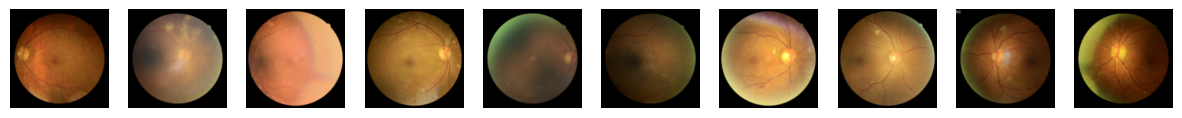

Diabetic Retinopathy Level 3


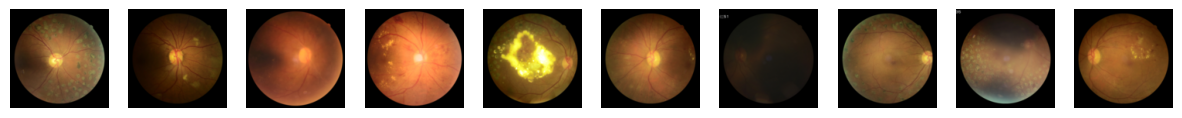

Diabetic Retinopathy Level 4


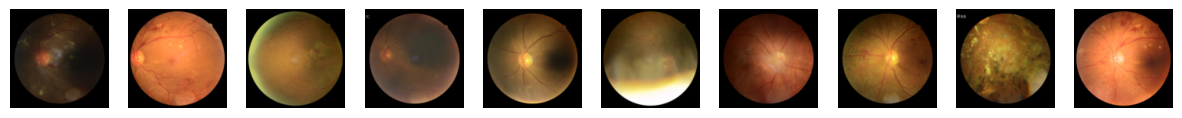

In [7]:
for i in range(5):
    labels = np.where(t_train==i)[0]
    idx = np.random.permutation(range(len(labels)))
    print(class_names[i])
    plt.figure(figsize=(15,3))
    for j in range(1,11):
        plt.subplot(1,10,j)
        plt.imshow(X_train[labels[j]])
        plt.axis('off')
    plt.pause(0.1);

# Saving a keras model

To save your trained ````tensorflow.keras```` models, you use the following command:

````python
model.save('model_dataset1.keras')
`````

Then, in the test notebook, to load your trained model, you may use:

````python
model_dataset1 = keras.models.load_model('model_dataset1.keras')
`````

---

# Assignment

1. Train a Convolutional Neural Network for **Lung X-Ray Dataset** using the training/validation/test split provided under dataset 1.
    * You may choose your own architecture to maximize performance in validation set (and by extension, the test set).
    * Use the ````BinaryCrossentropy```` loss function.
    * Use the ````sigmoid```` activation function in the output layer.
    * Track two metrics: (1) ````BinaryAccuracy(threshold=0.5)````, and (2) AUC.
    * Choose a learning algorithm and tune the learning rate adequately.
    * Report performance results in training and validation sets.
    * Display the learning curves.

---

2. Train a Convolutional Neural Network for **Retina Dataset** using the training/validation/test split provided under dataset 2.
    * You may choose your own architecture to maximize performance in validation set (and by extension, the test set).
    * Decide on the most appropriate loss function, activation function at the output layer, learning algorithm, and the learning rate.
    * Track two metrics: (1) Accuracy, and (2) AUC.
    * Report performance results in training and validation sets.
    * Display the learning curves.

---

### Test Function

For the test notebook, report performance in the test set for both dataset 1 and dataset 2.

Your test Notebook should include:

1. Loading trained models from problems 1 and 2 (see example above on how to save and load keras models).
    * If the models are too big, upload the ````keras```` model as a comment to your Canvas assignment.
2. Make predictions to the respective test sets.
3. Include learning curves for both models, and confusion matrices in your report.

---

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

---